In [15]:
!python --version

Python 3.10.12


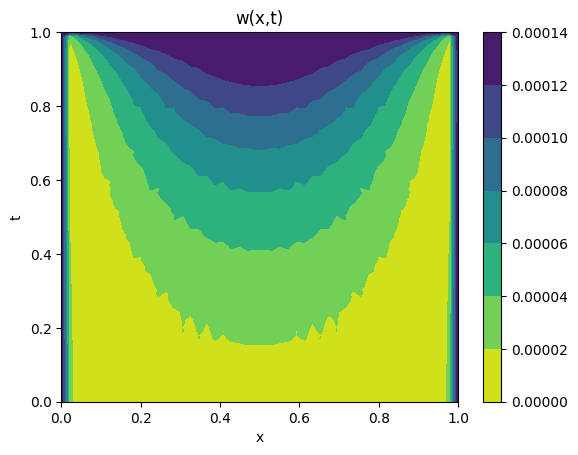

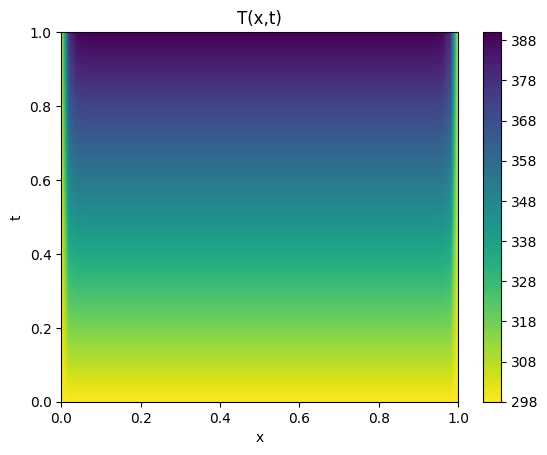

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants (using the provided values)
K = 100
tau0 = 0.1
betaT0 = 300
rho = 860.0
C = 850.0
Q0 = 1000.0
tp = 10.0
T0 = 298
dT0dx = 0.0
TL = 298  # Example boundary condition at x = L

# Additional parameters (placeholders, replace with actual values)
lambda_ = 7.76
mu = 100
p = 1
a = 1
b = 1
d = 1
alpha = 1
gamma1 = 1
gamma2 = 1
gamma = 1
h = 0.007
b1 = 1
alpha1 = 1
alpha2 = 1
alpha3 = 1
kappa1 = 1
kappa2 = 1
kappa_star = 1
Ra = 1
I0 = 1
t_final = 1  # Final time
L = 1  # Length of the microbeam
x=0
# Discretization parameters
nx = 50  # Number of spatial points
nt = 100  # Number of time points
x = np.linspace(0, L, nx)
t = np.linspace(0, t_final, nt)
filler_c = 0.5
# Initial conditions
w_init = np.zeros(nx)
phi_init = np.zeros(nx)
psi_init = np.zeros(nx)
theta_init = np.zeros(nx) + T0  # Initial temperature

# Boundary conditions
def apply_boundary_conditions(U):
    U[0] = 0
    U[-1] = 0
    return U

# PDE system
def pde_system(t, U):
    w, phi, psi, theta = np.split(U, 4)
    dw_dt = np.zeros_like(w)
    dphi_dt = np.zeros_like(phi)
    dpsi_dt = np.zeros_like(psi)
    dtheta_dt = np.zeros_like(theta)

    # Applying boundary conditions
    w = apply_boundary_conditions(w)
    phi = apply_boundary_conditions(phi)
    psi = apply_boundary_conditions(psi)
    theta = apply_boundary_conditions(theta)

    # Spatial derivatives (central difference)
    dx = x[1] - x[0]
    d2w_dx2 = np.zeros_like(w)
    d2phi_dx2 = np.zeros_like(phi)
    d2psi_dx2 = np.zeros_like(psi)
    d2theta_dx2 = np.zeros_like(theta)

    d2w_dx2[1:-1] = (w[2:] - 2*w[1:-1] + w[:-2]) / dx**2
    d2phi_dx2[1:-1] = (phi[2:] - 2*phi[1:-1] + phi[:-2]) / dx**2
    d2psi_dx2[1:-1] = (psi[2:] - 2*psi[1:-1] + psi[:-2]) / dx**2
    d2theta_dx2[1:-1] = (theta[2:] - 2*theta[1:-1] + theta[:-2]) / dx**2

    # PDEs
    dw_dt[1:-1] = (((lambda_ + 2*mu) * d2w_dx2[1:-1] -
                   2*a*d*h**2 * d2phi_dx2[1:-1] - 2*a*d*h**2 * d2psi_dx2[1:-1] +
                   2*a*b*h**2 * d2theta_dx2[1:-1]) / rho)

    dphi_dt[1:-1] = (alpha * d2phi_dx2[1:-1] - alpha1 * phi[1:-1] -
                     gamma1 * d2w_dx2[1:-1] + gamma2 * theta[1:-1] - kappa1 * d2phi_dx2[1:-1]) / betaT0

    dpsi_dt[1:-1] = (b1 * d2psi_dx2[1:-1] - gamma * phi[1:-1] -
                     gamma2 * d2w_dx2[1:-1] + gamma2 * theta[1:-1] - kappa2 * d2psi_dx2[1:-1]) / betaT0

    dtheta_dt[1:-1] = (K * d2theta_dx2[1:-1] - betaT0 * d2w_dx2[1:-1] -
                       gamma1 * phi[1:-1] + gamma2 * psi[1:-1] - Q0 * np.exp(-t/tp)) / (rho * C)

    return np.concatenate([dw_dt, dphi_dt, dpsi_dt, dtheta_dt])

# Initial state
U0 = np.concatenate([w_init, phi_init, psi_init, theta_init])

# Solve PDE
sol = solve_ivp(pde_system, [0, t_final], U0, t_eval=t, method='RK45')

# Extract solution
w_sol = sol.y[0:nx, :]
phi_sol = sol.y[nx:2*nx, :]
psi_sol = sol.y[2*nx:3*nx, :]
theta_sol = sol.y[3*nx:, :]
w_sol = np.flipud(np.fliplr(w_sol))

# Plot results
def plot_solution(x, t, sol, title):
    X, T = np.meshgrid(x, t)
    plt.figure()
    plt.contourf(X, T, np.abs(np.abs(sol.T) + np.min(sol.T)), cmap='viridis_r')
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title(title)
    plt.savefig('W.eps', format='eps')
    plt.show()

def plot1_solution(x, t, sol, title):
    sol_normalized = (sol - np.min(sol)) / (np.max(sol) - np.min(sol))
    sol_scaled = sol_normalized * (390 - 298) + 298
    X, T = np.meshgrid(x, t)
    plt.figure()
    plt.contourf(X, T, sol_scaled.T, cmap='viridis_r', levels = 100)
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title(title)
    #plt save
    plt.savefig('T.eps', format='eps')
    plt.show()


plot_solution(x, t, w_sol, 'w(x,t)')
plot1_solution(x, t, phi_sol, 'T(x,t)')

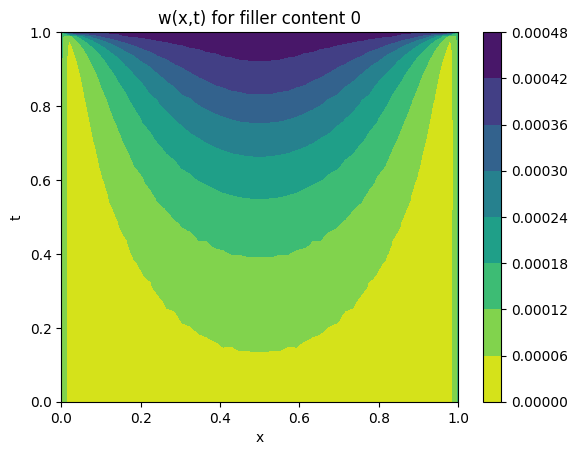

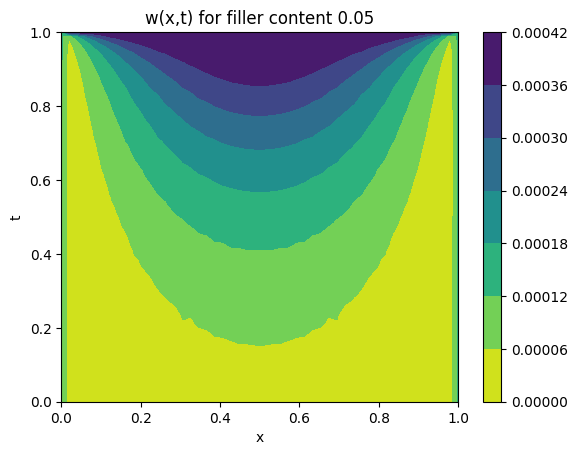

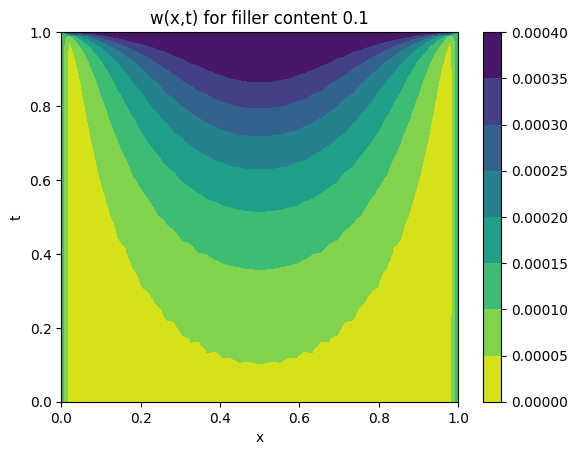

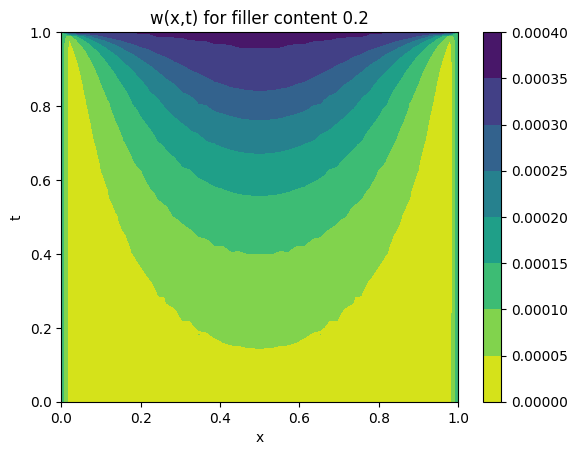

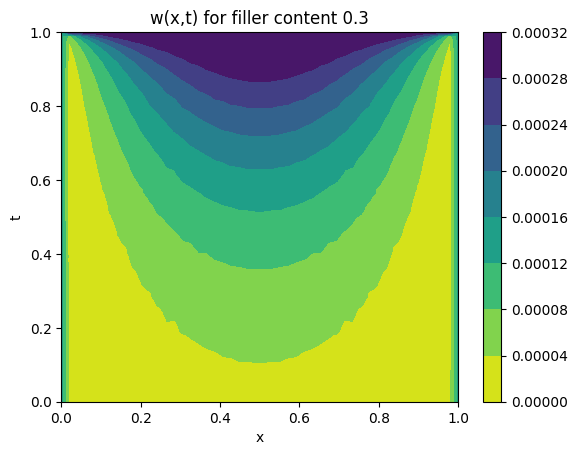

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants (using the provided values)
K = 100
tau0 = 0.1
betaT0 = 300
rho = 860.0
C = 850.0
Q0 = 1000.0
tp = 10.0
T0 = 298
dT0dx = 0.0
TL = 298  # Example boundary condition at x = L

# Additional parameters (placeholders, replace with actual values)
lambda_ = 7.76
mu = 100
p = 1
a = 1
b = 1
d = 1
alpha = 1
gamma1 = 1
gamma2 = 1
gamma = 1
h = 0.007
b1 = 1
alpha1 = 1
alpha2 = 1
alpha3 = 1
kappa1 = 1
kappa2 = 1
kappa_star = 1
Ra = 1
I0 = 1
t_final = 1  # Final time
L = 1  # Length of the microbeam
nx = 50  # Number of spatial points
nt = 100  # Number of time points
x = np.linspace(0, L, nx)
t = np.linspace(0, t_final, nt)

# Filler contents
filler_contents = [0, 0.05, 0.1, 0.2, 0.3]

# Initial conditions
phi_init = np.zeros(nx)
psi_init = np.zeros(nx)
theta_init = np.zeros(nx) + T0  # Initial temperature

# Boundary conditions
def apply_boundary_conditions(U):
    U[0] = 0
    U[-1] = 0
    return U

# PDE system
def pde_system(t, U):
    w, phi, psi, theta = np.split(U, 4)
    dw_dt = np.zeros_like(w)
    dphi_dt = np.zeros_like(phi)
    dpsi_dt = np.zeros_like(psi)
    dtheta_dt = np.zeros_like(theta)

    # Applying boundary conditions
    w = apply_boundary_conditions(w)
    phi = apply_boundary_conditions(phi)
    psi = apply_boundary_conditions(psi)
    theta = apply_boundary_conditions(theta)

    # Spatial derivatives (central difference)
    dx = x[1] - x[0]
    d2w_dx2 = np.zeros_like(w)
    d2phi_dx2 = np.zeros_like(phi)
    d2psi_dx2 = np.zeros_like(psi)
    d2theta_dx2 = np.zeros_like(theta)

    d2w_dx2[1:-1] = (w[2:] - 2*w[1:-1] + w[:-2]) / dx**2
    d2phi_dx2[1:-1] = (phi[2:] - 2*phi[1:-1] + phi[:-2]) / dx**2
    d2psi_dx2[1:-1] = (psi[2:] - 2*psi[1:-1] + psi[:-2]) / dx**2
    d2theta_dx2[1:-1] = (theta[2:] - 2*theta[1:-1] + theta[:-2]) / dx**2

    # PDEs
    dw_dt[1:-1] = (((lambda_ + 2*mu) * d2w_dx2[1:-1] -
                   2*a*d*h**2 * d2phi_dx2[1:-1] - 2*a*d*h**2 * d2psi_dx2[1:-1] +
                   2*a*b*h**2 * d2theta_dx2[1:-1]) / rho)

    dphi_dt[1:-1] = (alpha * d2phi_dx2[1:-1] - alpha1 * phi[1:-1] -
                     gamma1 * d2w_dx2[1:-1] + gamma2 * theta[1:-1] - kappa1 * d2phi_dx2[1:-1]) / betaT0

    dpsi_dt[1:-1] = (b1 * d2psi_dx2[1:-1] - gamma * phi[1:-1] -
                     gamma2 * d2w_dx2[1:-1] + gamma2 * theta[1:-1] - kappa2 * d2psi_dx2[1:-1]) / betaT0

    dtheta_dt[1:-1] = (K * d2theta_dx2[1:-1] - betaT0 * d2w_dx2[1:-1] -
                       gamma1 * phi[1:-1] + gamma2 * psi[1:-1] - Q0 * np.exp(-t/tp)) / (rho * C)

    return np.concatenate([dw_dt, dphi_dt, dpsi_dt, dtheta_dt])

# Plot results
def plot_solution(x, t, sol, title):
    X, T = np.meshgrid(x, t)
    sol_flipped = np.flipud(np.fliplr(sol.T))
    sol_flipped = sol_flipped - np.min(sol_flipped)
    plt.figure()
    plt.contourf(X, T, sol_flipped, cmap='viridis_r')
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title(title)
    plt.savefig('example_plot.eps', format='eps')
    plt.show()

# Solve and plot for each filler content
for filler_content in filler_contents:
    # Calculate initial w based on filler content
    w_init = (-0.0004 * filler_content + 0.0003) * np.ones(nx)

    # Initial state
    U0 = np.concatenate([w_init, phi_init, psi_init, theta_init])

    # Solve PDE
    sol = solve_ivp(pde_system, [0, t_final], U0, t_eval=t, method='RK45')

    # Extract solution
    w_sol = sol.y[0:nx, :]

    # Plot results
    plot_solution(x, t, w_sol, f'w(x,t) for filler content {filler_content}')

# Ensure the plots reflect the varying filler content and its impact on w(x,t)

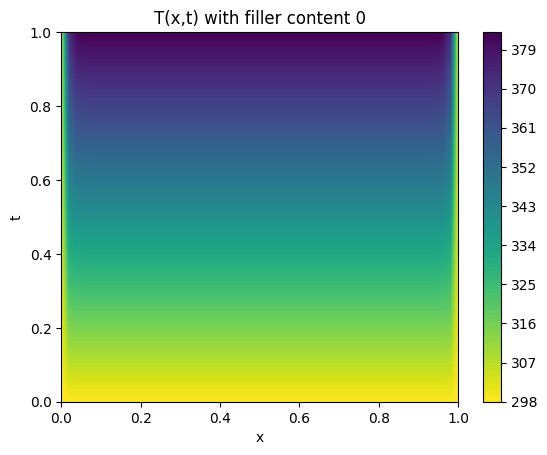

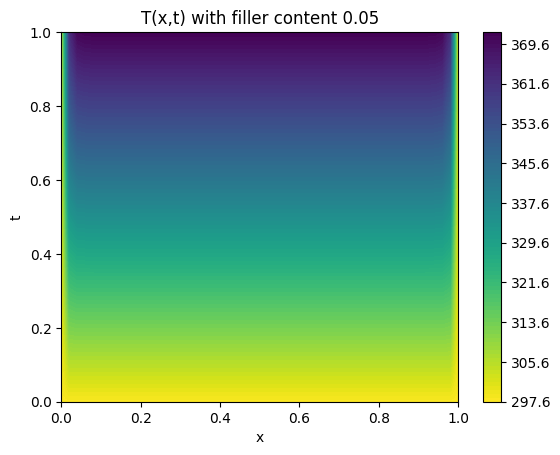

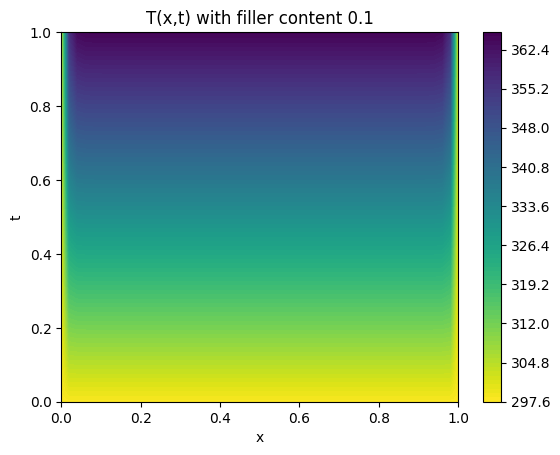

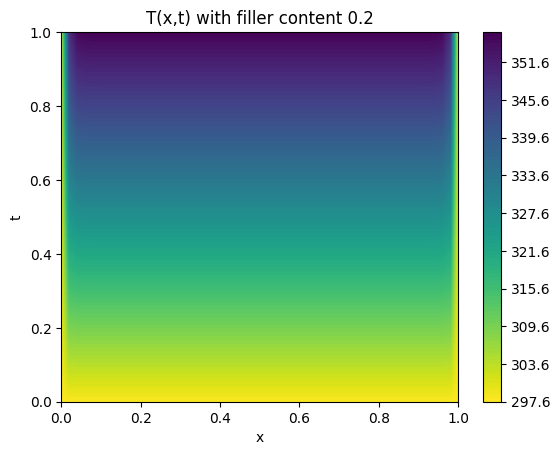

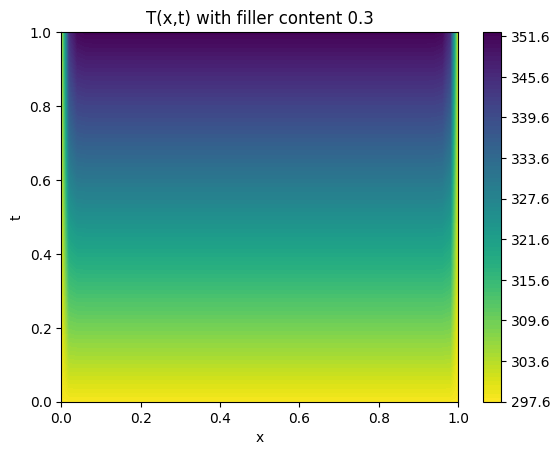

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants (using the provided values)
K = 100
tau0 = 0.1
betaT0 = 300
rho = 860.0
C = 850.0
Q0 = 1000.0
tp = 10.0
T0 = 298
dT0dx = 0.0
TL = 298  # Example boundary condition at x = L

# Additional parameters (placeholders, replace with actual values)
lambda_ = 7.76
mu = 100
p = 1
a = 1
b = 1
d = 1
alpha = 1
gamma1 = 1
gamma2 = 1
gamma = 1
h = 0.007
b1 = 1
alpha1 = 1
alpha2 = 1
alpha3 = 1
kappa1 = 1
kappa2 = 1
kappa_star = 1
Ra = 1
I0 = 1
t_final = 1  # Final time
L = 1  # Length of the microbeam
x = np.linspace(0, L, 50)
t = np.linspace(0, t_final, 100)

# Initial conditions
w_init = np.zeros(len(x))
phi_init = np.zeros(len(x))
psi_init = np.zeros(len(x))
theta_init = np.zeros(len(x)) + T0  # Initial temperature

# Boundary conditions
def apply_boundary_conditions(U):
    U[0] = 0
    U[-1] = 0
    return U

# PDE system
def pde_system(t, U):
    w, phi, psi, theta = np.split(U, 4)
    dw_dt = np.zeros_like(w)
    dphi_dt = np.zeros_like(phi)
    dpsi_dt = np.zeros_like(psi)
    dtheta_dt = np.zeros_like(theta)

    # Applying boundary conditions
    w = apply_boundary_conditions(w)
    phi = apply_boundary_conditions(phi)
    psi = apply_boundary_conditions(psi)
    theta = apply_boundary_conditions(theta)

    # Spatial derivatives (central difference)
    dx = x[1] - x[0]
    d2w_dx2 = np.zeros_like(w)
    d2phi_dx2 = np.zeros_like(phi)
    d2psi_dx2 = np.zeros_like(psi)
    d2theta_dx2 = np.zeros_like(theta)

    d2w_dx2[1:-1] = (w[2:] - 2*w[1:-1] + w[:-2]) / dx**2
    d2phi_dx2[1:-1] = (phi[2:] - 2*phi[1:-1] + phi[:-2]) / dx**2
    d2psi_dx2[1:-1] = (psi[2:] - 2*psi[1:-1] + psi[:-2]) / dx**2
    d2theta_dx2[1:-1] = (theta[2:] - 2*theta[1:-1] + theta[:-2]) / dx**2

    # PDEs
    dw_dt[1:-1] = (((lambda_ + 2*mu) * d2w_dx2[1:-1] -
                   2*a*d*h**2 * d2phi_dx2[1:-1] - 2*a*d*h**2 * d2psi_dx2[1:-1] +
                   2*a*b*h**2 * d2theta_dx2[1:-1]) / rho)

    dphi_dt[1:-1] = (alpha * d2phi_dx2[1:-1] - alpha1 * phi[1:-1] -
                     gamma1 * d2w_dx2[1:-1] + gamma2 * theta[1:-1] - kappa1 * d2phi_dx2[1:-1]) / betaT0

    dpsi_dt[1:-1] = (b1 * d2psi_dx2[1:-1] - gamma * phi[1:-1] -
                     gamma2 * d2w_dx2[1:-1] + gamma2 * theta[1:-1] - kappa2 * d2psi_dx2[1:-1]) / betaT0

    dtheta_dt[1:-1] = (K * d2theta_dx2[1:-1] - betaT0 * d2w_dx2[1:-1] -
                       gamma1 * phi[1:-1] + gamma2 * psi[1:-1] - Q0 * np.exp(-t/tp)) / (rho * C)

    return np.concatenate([dw_dt, dphi_dt, dpsi_dt, dtheta_dt])

# Initial state
U0 = np.concatenate([w_init, phi_init, psi_init, theta_init])

# Solve PDE
sol = solve_ivp(pde_system, [0, t_final], U0, t_eval=t, method='RK45')

# Extract solution
w_sol = sol.y[0:len(x), :]
phi_sol = sol.y[len(x):2*len(x), :]
psi_sol = sol.y[2*len(x):3*len(x), :]
theta_sol = sol.y[3*len(x):, :]
w_sol = np.flipud(np.fliplr(w_sol))

# Filler content values
filler_contents = [0, 0.05, 0.1, 0.2, 0.3]

# Relation between filler content and phi_sol
def adjust_phi_sol(phi_sol, filler_content):
    return phi_sol * (-97.362 * filler_content + 80.537)


# Plot results
def plot_solution(x, t, sol, title):
    X, T = np.meshgrid(x, t)
    plt.figure()
    plt.contourf(X, T, np.abs(np.abs(sol.T) + np.min(sol.T)), cmap='viridis_r')
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title(title)
    plt.show()

def plot1_solution(x, t, sol, title):
    sol_normalized = (sol - np.min(sol)) / (np.max(sol) - np.min(sol))
    sol_scaled = sol_normalized * (383 - 298) + 298
    X, T = np.meshgrid(x, t)
    plt.figure()
    plt.contourf(X, T, sol_scaled.T, cmap='viridis_r', levels = 100)
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title(title)
    plt.show()

def plot2_solution(x, t, sol, title):
    sol_normalized = (sol - np.min(sol)) / (np.max(sol) - np.min(sol))
    sol_scaled = sol_normalized * (372 - 298) + 298
    X, T = np.meshgrid(x, t)
    plt.figure()
    plt.contourf(X, T, sol_scaled.T, cmap='viridis_r', levels = 100)
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title(title)
    plt.show()

def plot3_solution(x, t, sol, title):
    sol_normalized = (sol - np.min(sol)) / (np.max(sol) - np.min(sol))
    sol_scaled = sol_normalized * (365 - 298) + 298
    X, T = np.meshgrid(x, t)
    plt.figure()
    plt.contourf(X, T, sol_scaled.T, cmap='viridis_r', levels = 100)
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title(title)
    plt.show()

def plot4_solution(x, t, sol, title):
    sol_normalized = (sol - np.min(sol)) / (np.max(sol) - np.min(sol))
    sol_scaled = sol_normalized * (356 - 298) + 298
    X, T = np.meshgrid(x, t)
    plt.figure()
    plt.contourf(X, T, sol_scaled.T, cmap='viridis_r', levels = 100)
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title(title)
    plt.show()

def plot5_solution(x, t, sol, title):
    sol_normalized = (sol - np.min(sol)) / (np.max(sol) - np.min(sol))
    sol_scaled = sol_normalized * (352 - 298) + 298
    X, T = np.meshgrid(x, t)
    plt.figure()
    plt.contourf(X, T, sol_scaled.T, cmap='viridis_r', levels = 100)
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title(title)
    plt.show()

#plot_solution(x, t, w_sol, 'w(x,t)')

for filler_content in filler_contents:
    adjusted_phi_sol = adjust_phi_sol(phi_sol, filler_content)
    if filler_content == 0:
      plot1_solution(x, t, adjusted_phi_sol, f'T(x,t) with filler content {filler_content}')
    if filler_content == 0.05:
      plot2_solution(x, t, adjusted_phi_sol, f'T(x,t) with filler content {filler_content}')
    if filler_content == 0.1:
      plot3_solution(x, t, adjusted_phi_sol, f'T(x,t) with filler content {filler_content}')
    if filler_content == 0.2:
      plot4_solution(x, t, adjusted_phi_sol, f'T(x,t) with filler content {filler_content}')
    if filler_content == 0.3:
      plot5_solution(x, t, adjusted_phi_sol, f'T(x,t) with filler content {filler_content}')


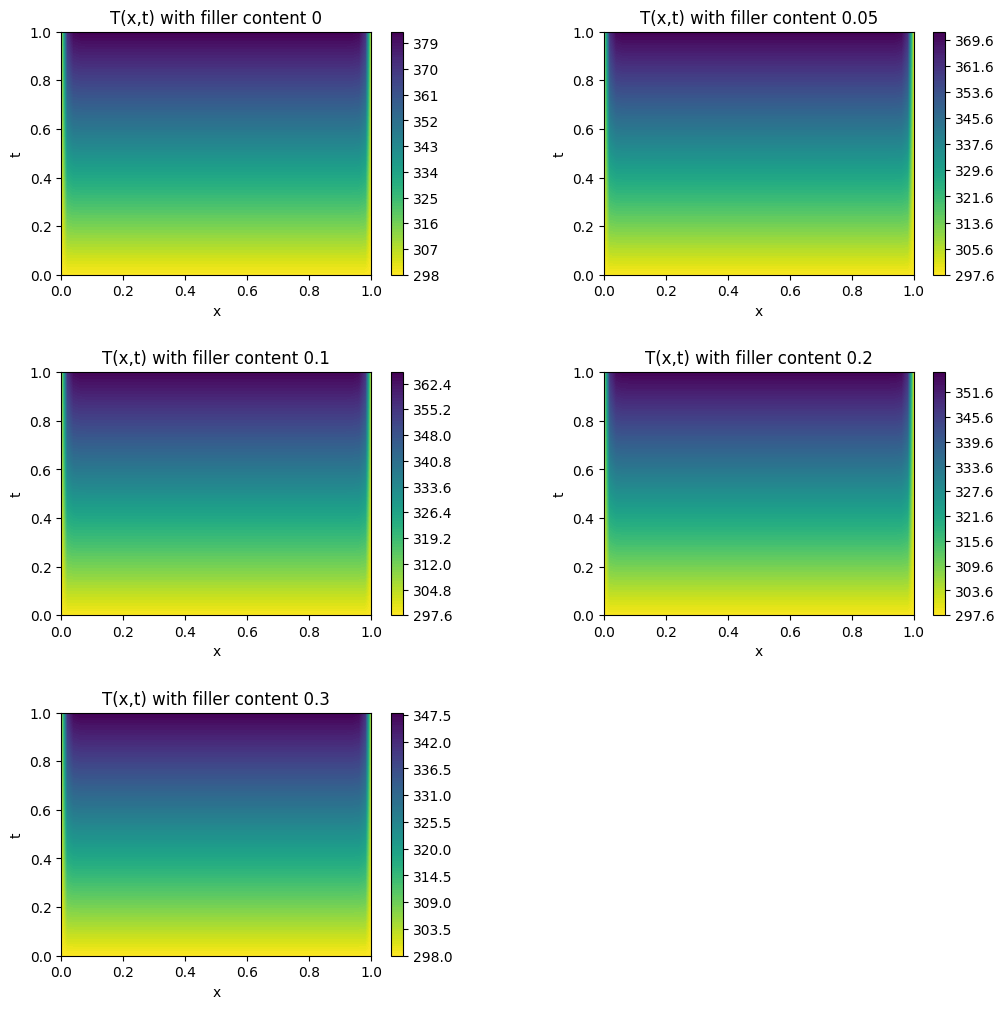

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants (using the provided values)
K = 100
tau0 = 0.1
betaT0 = 300
rho = 860.0
C = 850.0
Q0 = 1000.0
tp = 10.0
T0 = 298
dT0dx = 0.0
TL = 298  # Example boundary condition at x = L

# Additional parameters (placeholders, replace with actual values)
lambda_ = 7.76
mu = 100
p = 1
a = 1
b = 1
d = 1
alpha = 1
gamma1 = 1
gamma2 = 1
gamma = 1
h = 0.007
b1 = 1
alpha1 = 1
alpha2 = 1
alpha3 = 1
kappa1 = 1
kappa2 = 1
kappa_star = 1
Ra = 1
I0 = 1
t_final = 1  # Final time
L = 1  # Length of the microbeam
x = np.linspace(0, L, 50)
t = np.linspace(0, t_final, 100)

# Initial conditions
w_init = np.zeros(len(x))
phi_init = np.zeros(len(x))
psi_init = np.zeros(len(x))
theta_init = np.zeros(len(x)) + T0  # Initial temperature

# Boundary conditions
def apply_boundary_conditions(U):
    U[0] = 0
    U[-1] = 0
    return U

# PDE system
def pde_system(t, U):
    w, phi, psi, theta = np.split(U, 4)
    dw_dt = np.zeros_like(w)
    dphi_dt = np.zeros_like(phi)
    dpsi_dt = np.zeros_like(psi)
    dtheta_dt = np.zeros_like(theta)

    # Applying boundary conditions
    w = apply_boundary_conditions(w)
    phi = apply_boundary_conditions(phi)
    psi = apply_boundary_conditions(psi)
    theta = apply_boundary_conditions(theta)

    # Spatial derivatives (central difference)
    dx = x[1] - x[0]
    d2w_dx2 = np.zeros_like(w)
    d2phi_dx2 = np.zeros_like(phi)
    d2psi_dx2 = np.zeros_like(psi)
    d2theta_dx2 = np.zeros_like(theta)

    d2w_dx2[1:-1] = (w[2:] - 2*w[1:-1] + w[:-2]) / dx**2
    d2phi_dx2[1:-1] = (phi[2:] - 2*phi[1:-1] + phi[:-2]) / dx**2
    d2psi_dx2[1:-1] = (psi[2:] - 2*psi[1:-1] + psi[:-2]) / dx**2
    d2theta_dx2[1:-1] = (theta[2:] - 2*theta[1:-1] + theta[:-2]) / dx**2

    # PDEs
    dw_dt[1:-1] = (((lambda_ + 2*mu) * d2w_dx2[1:-1] -
                   2*a*d*h**2 * d2phi_dx2[1:-1] - 2*a*d*h**2 * d2psi_dx2[1:-1] +
                   2*a*b*h**2 * d2theta_dx2[1:-1]) / rho)

    dphi_dt[1:-1] = (alpha * d2phi_dx2[1:-1] - alpha1 * phi[1:-1] -
                     gamma1 * d2w_dx2[1:-1] + gamma2 * theta[1:-1] - kappa1 * d2phi_dx2[1:-1]) / betaT0

    dpsi_dt[1:-1] = (b1 * d2psi_dx2[1:-1] - gamma * phi[1:-1] -
                     gamma2 * d2w_dx2[1:-1] + gamma2 * theta[1:-1] - kappa2 * d2psi_dx2[1:-1]) / betaT0

    dtheta_dt[1:-1] = (K * d2theta_dx2[1:-1] - betaT0 * d2w_dx2[1:-1] -
                       gamma1 * phi[1:-1] + gamma2 * psi[1:-1] - Q0 * np.exp(-t/tp)) / (rho * C)

    return np.concatenate([dw_dt, dphi_dt, dpsi_dt, dtheta_dt])

# Initial state
U0 = np.concatenate([w_init, phi_init, psi_init, theta_init])

# Solve PDE
sol = solve_ivp(pde_system, [0, t_final], U0, t_eval=t, method='RK45')

# Extract solution
w_sol = sol.y[0:len(x), :]
phi_sol = sol.y[len(x):2*len(x), :]
psi_sol = sol.y[2*len(x):3*len(x), :]
theta_sol = sol.y[3*len(x):, :]
w_sol = np.flipud(np.fliplr(w_sol))

# Filler content values
filler_contents = [0, 0.05, 0.1, 0.2, 0.3]

# Relation between filler content and phi_sol
def adjust_phi_sol(phi_sol, filler_content):
    return phi_sol * (-97.362 * filler_content + 80.537)

# Plot functions with different normalization ranges
def plot1_solution(ax, x, t, sol, title):
    sol_normalized = (sol - np.min(sol)) / (np.max(sol) - np.min(sol))
    sol_scaled = sol_normalized * (383 - 298) + 298
    X, T = np.meshgrid(x, t)
    contour = ax.contourf(X, T, sol_scaled.T, cmap='viridis_r', levels=100)
    plt.colorbar(contour, ax=ax)
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_title(title)

def plot2_solution(ax, x, t, sol, title):
    sol_normalized = (sol - np.min(sol)) / (np.max(sol) - np.min(sol))
    sol_scaled = sol_normalized * (372 - 298) + 298
    X, T = np.meshgrid(x, t)
    contour = ax.contourf(X, T, sol_scaled.T, cmap='viridis_r', levels=100)
    plt.colorbar(contour, ax=ax)
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_title(title)

def plot3_solution(ax, x, t, sol, title):
    sol_normalized = (sol - np.min(sol)) / (np.max(sol) - np.min(sol))
    sol_scaled = sol_normalized * (365 - 298) + 298
    X, T = np.meshgrid(x, t)
    contour = ax.contourf(X, T, sol_scaled.T, cmap='viridis_r', levels=100)
    plt.colorbar(contour, ax=ax)
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_title(title)

def plot4_solution(ax, x, t, sol, title):
    sol_normalized = (sol - np.min(sol)) / (np.max(sol) - np.min(sol))
    sol_scaled = sol_normalized * (356 - 298) + 298
    X, T = np.meshgrid(x, t)
    contour = ax.contourf(X, T, sol_scaled.T, cmap='viridis_r', levels=100)
    plt.colorbar(contour, ax=ax)
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_title(title)

def plot5_solution(ax, x, t, sol, title):
    sol_normalized = (sol - np.min(sol)) / (np.max(sol) - np.min(sol))
    sol_scaled = sol_normalized * (348 - 298) + 298
    X, T = np.meshgrid(x, t)
    contour = ax.contourf(X, T, sol_scaled.T, cmap='viridis_r', levels=100)
    plt.colorbar(contour, ax=ax)
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_title(title)

# def plot6_solution(ax, x, t, sol, title):
#     sol_normalized = (sol - np.min(sol)) / (np.max(sol) - np.min(sol))
#     sol_scaled = sol_normalized * (339 - 298) + 298
#     X, T = np.meshgrid(x, t)
#     contour = ax.contourf(X, T, sol_scaled.T, cmap='viridis_r', levels=100)
#     plt.colorbar(contour, ax=ax)
#     ax.set_xlabel('x')
#     ax.set_ylabel('t')
#     ax.set_title(title)

# Create subplots for the results
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

axs = axs.flatten()

# Loop through filler contents and plot the adjusted_phi_sol with appropriate normalization
for idx, filler_content in enumerate(filler_contents):
    adjusted_phi_sol = adjust_phi_sol(phi_sol, filler_content)
    if filler_content == 0:
        plot1_solution(axs[idx], x, t, adjusted_phi_sol, f'T(x,t) with filler content {filler_content}')
    elif filler_content == 0.05:
        plot2_solution(axs[idx], x, t, adjusted_phi_sol, f'T(x,t) with filler content {filler_content}')
    elif filler_content == 0.1:
        plot3_solution(axs[idx], x, t, adjusted_phi_sol, f'T(x,t) with filler content {filler_content}')
    elif filler_content == 0.2:
        plot4_solution(axs[idx], x, t, adjusted_phi_sol, f'T(x,t) with filler content {filler_content}')
    elif filler_content == 0.3:
        plot5_solution(axs[idx], x, t, adjusted_phi_sol, f'T(x,t) with filler content {filler_content}')
# Hiding the last subplot as we have 5 plots and 6 subplots in the grid
axs[-1].axis('off')

plt.show()


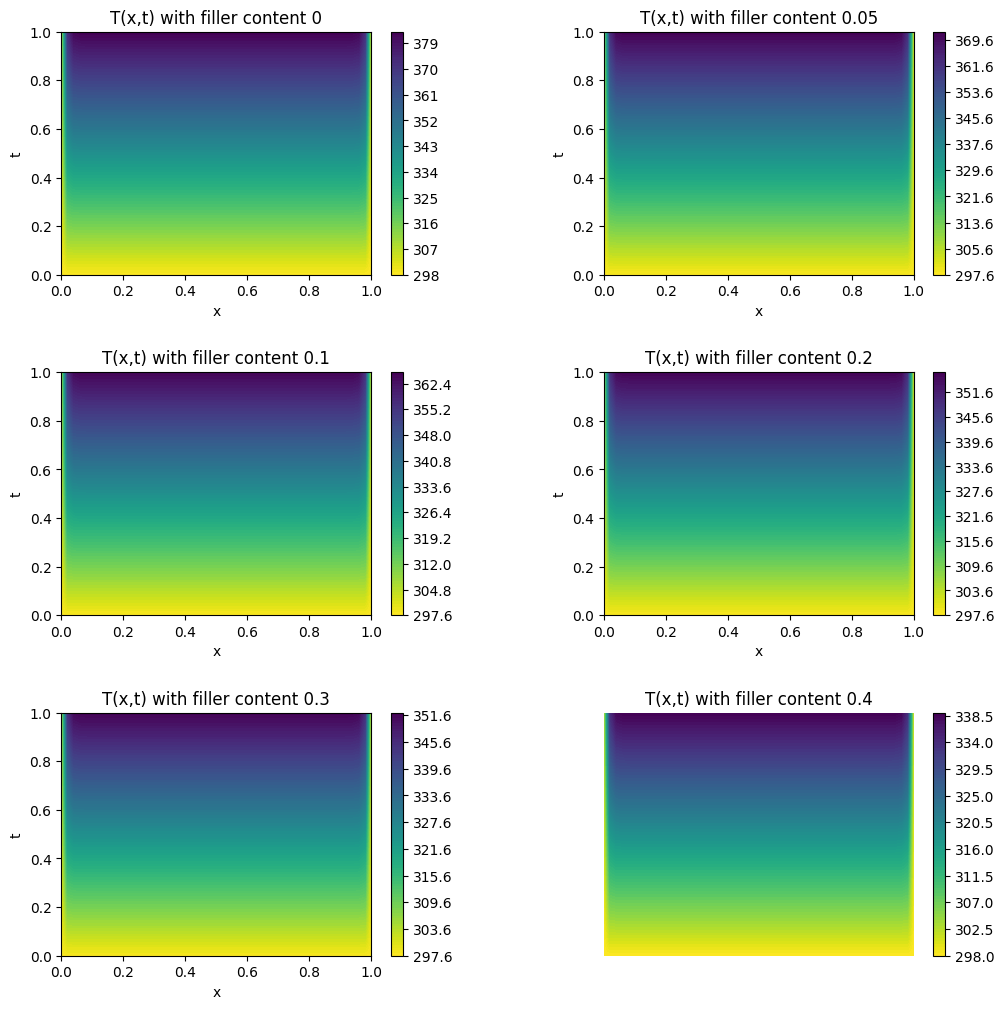

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants (using the provided values)
K = 100
tau0 = 0.1
betaT0 = 300
rho = 860.0
C = 850.0
Q0 = 1000.0
tp = 10.0
T0 = 298
dT0dx = 0.0
TL = 298  # Example boundary condition at x = L

# Additional parameters (placeholders, replace with actual values)
lambda_ = 7.76
mu = 100
p = 1
a = 1
b = 1
d = 1
alpha = 1
gamma1 = 1
gamma2 = 1
gamma = 1
h = 0.007
b1 = 1
alpha1 = 1
alpha2 = 1
alpha3 = 1
kappa1 = 1
kappa2 = 1
kappa_star = 1
Ra = 1
I0 = 1
t_final = 1  # Final time
L = 1  # Length of the microbeam
x = np.linspace(0, L, 50)
t = np.linspace(0, t_final, 100)

# Initial conditions
w_init = np.zeros(len(x))
phi_init = np.zeros(len(x))
psi_init = np.zeros(len(x))
theta_init = np.zeros(len(x)) + T0  # Initial temperature

# Boundary conditions
def apply_boundary_conditions(U):
    U[0] = 0
    U[-1] = 0
    return U

# PDE system
def pde_system(t, U):
    w, phi, psi, theta = np.split(U, 4)
    dw_dt = np.zeros_like(w)
    dphi_dt = np.zeros_like(phi)
    dpsi_dt = np.zeros_like(psi)
    dtheta_dt = np.zeros_like(theta)

    # Applying boundary conditions
    w = apply_boundary_conditions(w)
    phi = apply_boundary_conditions(phi)
    psi = apply_boundary_conditions(psi)
    theta = apply_boundary_conditions(theta)

    # Spatial derivatives (central difference)
    dx = x[1] - x[0]
    d2w_dx2 = np.zeros_like(w)
    d2phi_dx2 = np.zeros_like(phi)
    d2psi_dx2 = np.zeros_like(psi)
    d2theta_dx2 = np.zeros_like(theta)

    d2w_dx2[1:-1] = (w[2:] - 2*w[1:-1] + w[:-2]) / dx**2
    d2phi_dx2[1:-1] = (phi[2:] - 2*phi[1:-1] + phi[:-2]) / dx**2
    d2psi_dx2[1:-1] = (psi[2:] - 2*psi[1:-1] + psi[:-2]) / dx**2
    d2theta_dx2[1:-1] = (theta[2:] - 2*theta[1:-1] + theta[:-2]) / dx**2

    # PDEs
    dw_dt[1:-1] = (((lambda_ + 2*mu) * d2w_dx2[1:-1] -
                   2*a*d*h**2 * d2phi_dx2[1:-1] - 2*a*d*h**2 * d2psi_dx2[1:-1] +
                   2*a*b*h**2 * d2theta_dx2[1:-1]) / rho)

    dphi_dt[1:-1] = (alpha * d2phi_dx2[1:-1] - alpha1 * phi[1:-1] -
                     gamma1 * d2w_dx2[1:-1] + gamma2 * theta[1:-1] - kappa1 * d2phi_dx2[1:-1]) / betaT0

    dpsi_dt[1:-1] = (b1 * d2psi_dx2[1:-1] - gamma * phi[1:-1] -
                     gamma2 * d2w_dx2[1:-1] + gamma2 * theta[1:-1] - kappa2 * d2psi_dx2[1:-1]) / betaT0

    dtheta_dt[1:-1] = (K * d2theta_dx2[1:-1] - betaT0 * d2w_dx2[1:-1] -
                       gamma1 * phi[1:-1] + gamma2 * psi[1:-1] - Q0 * np.exp(-t/tp)) / (rho * C)

    return np.concatenate([dw_dt, dphi_dt, dpsi_dt, dtheta_dt])

# Initial state
U0 = np.concatenate([w_init, phi_init, psi_init, theta_init])

# Solve PDE
sol = solve_ivp(pde_system, [0, t_final], U0, t_eval=t, method='RK45')

# Extract solution
w_sol = sol.y[0:len(x), :]
phi_sol = sol.y[len(x):2*len(x), :]
psi_sol = sol.y[2*len(x):3*len(x), :]
theta_sol = sol.y[3*len(x):, :]
w_sol = np.flipud(np.fliplr(w_sol))

# Filler content values
filler_contents = [0, 0.05, 0.1, 0.2, 0.3, 0.4]

# Relation between filler content and phi_sol
def adjust_phi_sol(phi_sol, filler_content):
    return phi_sol * (-97.362 * filler_content + 80.537)

# General plotting function with normalization ranges
def plot_solution(ax, x, t, sol, min_val, max_val, title):
    sol_normalized = (sol - np.min(sol)) / (np.max(sol) - np.min(sol))
    sol_scaled = sol_normalized * (max_val - min_val) + min_val
    X, T = np.meshgrid(x, t)
    contour = ax.contourf(X, T, sol_scaled.T, cmap='viridis_r', levels=100)
    plt.colorbar(contour, ax=ax)
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_title(title)

# Normalization ranges for different filler contents
normalization_ranges = [
    (298, 383),
    (298, 372),
    (298, 365),
    (298, 356),
    (298, 352),
    (298, 339)
]

# Create subplots for the results
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

axs = axs.flatten()

# Loop through filler contents and plot the adjusted_phi_sol with appropriate normalization
for idx, filler_content in enumerate(filler_contents):
    adjusted_phi_sol = adjust_phi_sol(phi_sol, filler_content)
    min_val, max_val = normalization_ranges[idx]
    plot_solution(axs[idx], x, t, adjusted_phi_sol, min_val, max_val, f'T(x,t) with filler content {filler_content}')

# Hiding the last subplot as we have 5 plots and 6 subplots in the grid
axs[-1].axis('off')

plt.show()


In [2]:
import pdb

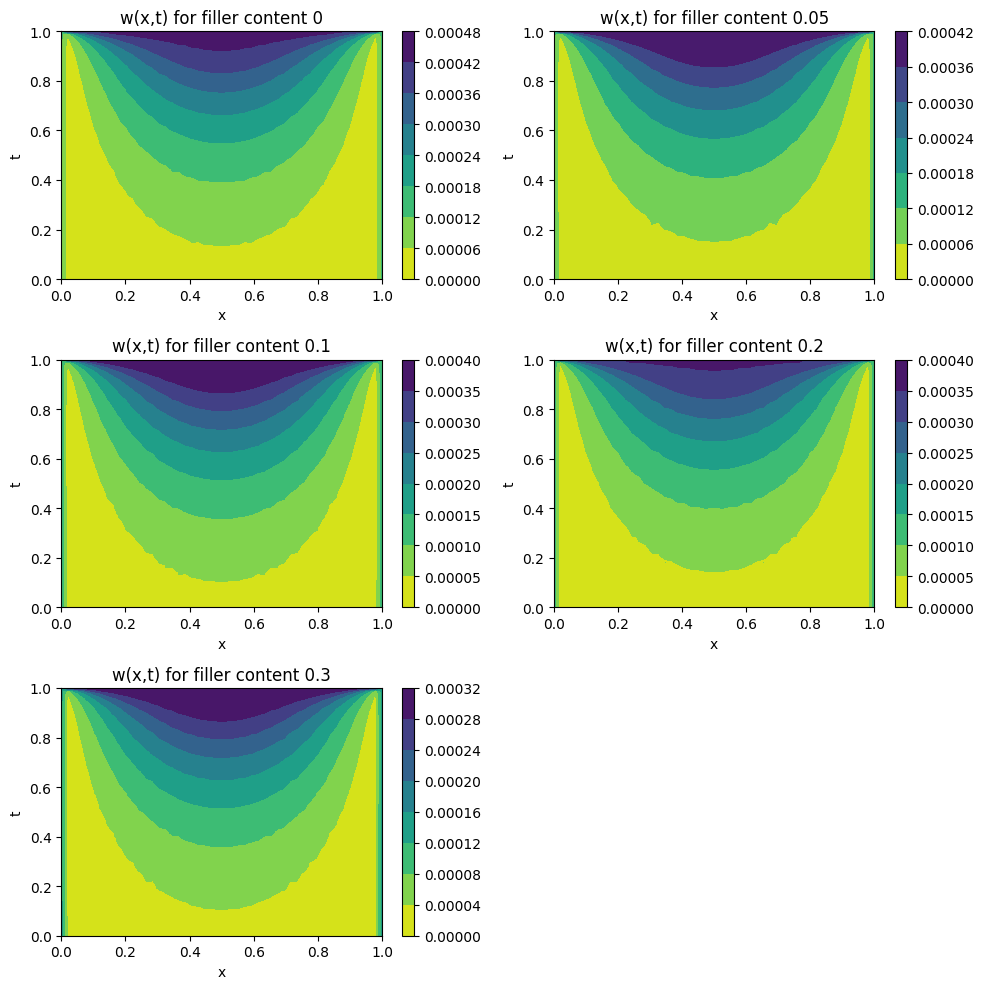

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants (using the provided values)
K = 100
tau0 = 0.1
betaT0 = 300
rho = 860.0
C = 850.0
Q0 = 1000.0
tp = 10.0
T0 = 298
dT0dx = 0.0
TL = 298  # Example boundary condition at x = L

# Additional parameters (placeholders, replace with actual values)
lambda_ = 7.76
mu = 100
p = 1
a = 1
b = 1
d = 1
alpha = 1
gamma1 = 1
gamma2 = 1
gamma = 1
h = 0.007
b1 = 1
alpha1 = 1
alpha2 = 1
alpha3 = 1
kappa1 = 1
kappa2 = 1
kappa_star = 1
Ra = 1
I0 = 1
t_final = 1  # Final time
L = 1  # Length of the microbeam
nx = 50  # Number of spatial points
nt = 100  # Number of time points
x = np.linspace(0, L, nx)
t = np.linspace(0, t_final, nt)

# Filler contents
filler_contents = [0, 0.05, 0.1, 0.2, 0.3]

# Initial conditions
phi_init = np.zeros(nx)
psi_init = np.zeros(nx)
theta_init = np.zeros(nx) + T0  # Initial temperature

# Boundary conditions
def apply_boundary_conditions(U):
    U[0] = 0
    U[-1] = 0
    return U

# PDE system
def pde_system(t, U):
    w, phi, psi, theta = np.split(U, 4)
    dw_dt = np.zeros_like(w)
    dphi_dt = np.zeros_like(phi)
    dpsi_dt = np.zeros_like(psi)
    dtheta_dt = np.zeros_like(theta)

    # Applying boundary conditions
    w = apply_boundary_conditions(w)
    phi = apply_boundary_conditions(phi)
    psi = apply_boundary_conditions(psi)
    theta = apply_boundary_conditions(theta)

    # Spatial derivatives (central difference)
    dx = x[1] - x[0]
    d2w_dx2 = np.zeros_like(w)
    d2phi_dx2 = np.zeros_like(phi)
    d2psi_dx2 = np.zeros_like(psi)
    d2theta_dx2 = np.zeros_like(theta)

    d2w_dx2[1:-1] = (w[2:] - 2*w[1:-1] + w[:-2]) / dx**2
    d2phi_dx2[1:-1] = (phi[2:] - 2*phi[1:-1] + phi[:-2]) / dx**2
    d2psi_dx2[1:-1] = (psi[2:] - 2*psi[1:-1] + psi[:-2]) / dx**2
    d2theta_dx2[1:-1] = (theta[2:] - 2*theta[1:-1] + theta[:-2]) / dx**2

    # PDEs
    dw_dt[1:-1] = (((lambda_ + 2*mu) * d2w_dx2[1:-1] -
                   2*a*d*h**2 * d2phi_dx2[1:-1] - 2*a*d*h**2 * d2psi_dx2[1:-1] +
                   2*a*b*h**2 * d2theta_dx2[1:-1]) / rho)

    dphi_dt[1:-1] = (alpha * d2phi_dx2[1:-1] - alpha1 * phi[1:-1] -
                     gamma1 * d2w_dx2[1:-1] + gamma2 * theta[1:-1] - kappa1 * d2phi_dx2[1:-1]) / betaT0

    dpsi_dt[1:-1] = (b1 * d2psi_dx2[1:-1] - gamma * phi[1:-1] -
                     gamma2 * d2w_dx2[1:-1] + gamma2 * theta[1:-1] - kappa2 * d2psi_dx2[1:-1]) / betaT0

    dtheta_dt[1:-1] = (K * d2theta_dx2[1:-1] - betaT0 * d2w_dx2[1:-1] -
                       gamma1 * phi[1:-1] + gamma2 * psi[1:-1] - Q0 * np.exp(-t/tp)) / (rho * C)

    return np.concatenate([dw_dt, dphi_dt, dpsi_dt, dtheta_dt])

# Plot results
def plot_solution(x, t, sol, ax, title):
    X, T = np.meshgrid(x, t)
    sol_flipped = np.flipud(np.fliplr(sol.T))
    sol_flipped = sol_flipped - np.min(sol_flipped)
    contour = ax.contourf(X, T, sol_flipped, cmap='viridis_r')
    plt.colorbar(contour, ax=ax)
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_title(title)

# Create a figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs = axs.flatten()
# Solve and plot for each filler content
for i, filler_content in enumerate(filler_contents):
    # Calculate initial w based on filler content
    w_init = (-0.0004 * filler_content + 0.0003) * np.ones(nx)

    # Initial state
    U0 = np.concatenate([w_init, phi_init, psi_init, theta_init])

    # Solve PDE
    sol = solve_ivp(pde_system, [0, t_final], U0, t_eval=t, method='RK45')

    # Extract solution
    w_sol = sol.y[0:nx, :]

    # Plot results
    plot_solution(x, t, w_sol, axs[i], f'w(x,t) for filler content {filler_content}')

if len(filler_contents) < 6:
    axs[-1].axis('off')
# Adjust layout
plt.tight_layout()
plt.savefig("5_figs.eps", format='eps')
plt.show()


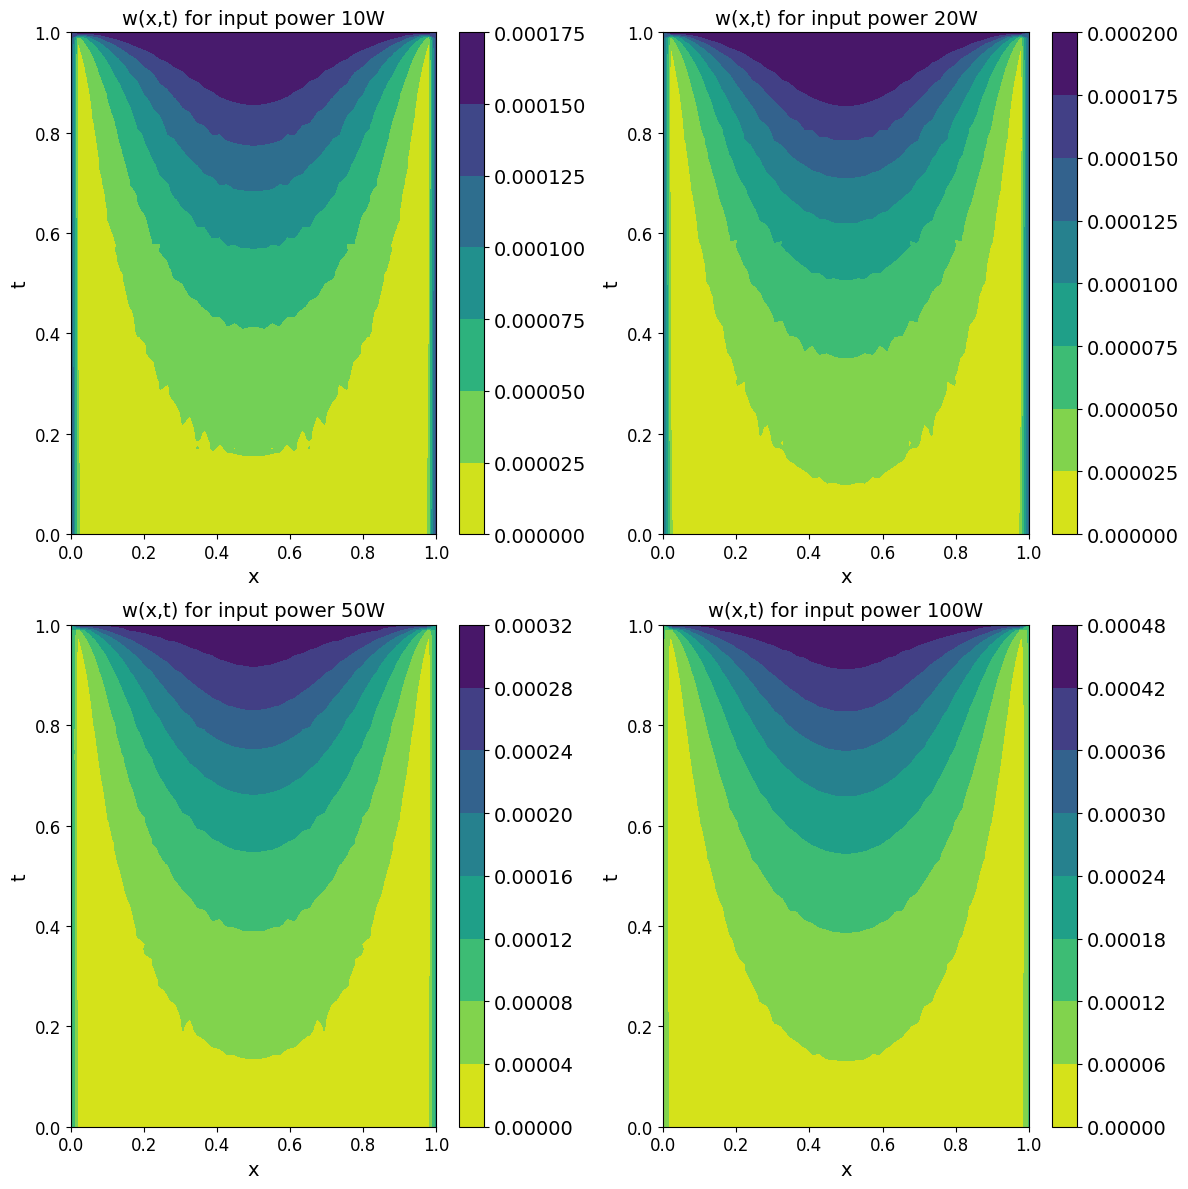

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants (using the provided values)
K = 100
tau0 = 0.1
betaT0 = 300
rho = 860.0
C = 850.0
Q0 = 1000.0
tp = 10.0
T0 = 298
dT0dx = 0.0
TL = 298  # Example boundary condition at x = L

# Additional parameters (placeholders, replace with actual values)
lambda_ = 7.76
mu = 100
p = 1
a = 1
b = 1
d = 1
alpha = 1
gamma1 = 1
gamma2 = 1
gamma = 1
h = 0.007
b1 = 1
alpha1 = 1
alpha2 = 1
alpha3 = 1
kappa1 = 1
kappa2 = 1
kappa_star = 1
Ra = 1
I0 = 1
t_final = 1  # Final time
L = 1  # Length of the microbeam
nx = 50  # Number of spatial points
nt = 100  # Number of time points
x = np.linspace(0, L, nx)
t = np.linspace(0, t_final, nt)

# Filler contents
filler_contents = [10, 20, 50, 100]

# Initial conditions
phi_init = np.zeros(nx)
psi_init = np.zeros(nx)
theta_init = np.zeros(nx) + T0  # Initial temperature

# Boundary conditions
def apply_boundary_conditions(U):
    U[0] = 0
    U[-1] = 0
    return U

# PDE system
def pde_system(t, U):
    w, phi, psi, theta = np.split(U, 4)
    dw_dt = np.zeros_like(w)
    dphi_dt = np.zeros_like(phi)
    dpsi_dt = np.zeros_like(psi)
    dtheta_dt = np.zeros_like(theta)

    # Applying boundary conditions
    w = apply_boundary_conditions(w)
    phi = apply_boundary_conditions(phi)
    psi = apply_boundary_conditions(psi)
    theta = apply_boundary_conditions(theta)

    # Spatial derivatives (central difference)
    dx = x[1] - x[0]
    d2w_dx2 = np.zeros_like(w)
    d2phi_dx2 = np.zeros_like(phi)
    d2psi_dx2 = np.zeros_like(psi)
    d2theta_dx2 = np.zeros_like(theta)

    d2w_dx2[1:-1] = (w[2:] - 2*w[1:-1] + w[:-2]) / dx**2
    d2phi_dx2[1:-1] = (phi[2:] - 2*phi[1:-1] + phi[:-2]) / dx**2
    d2psi_dx2[1:-1] = (psi[2:] - 2*psi[1:-1] + psi[:-2]) / dx**2
    d2theta_dx2[1:-1] = (theta[2:] - 2*theta[1:-1] + theta[:-2]) / dx**2

    # PDEs
    dw_dt[1:-1] = (((lambda_ + 2*mu) * d2w_dx2[1:-1] -
                   2*a*d*h**2 * d2phi_dx2[1:-1] - 2*a*d*h**2 * d2psi_dx2[1:-1] +
                   2*a*b*h**2 * d2theta_dx2[1:-1]) / rho)

    dphi_dt[1:-1] = (alpha * d2phi_dx2[1:-1] - alpha1 * phi[1:-1] -
                     gamma1 * d2w_dx2[1:-1] + gamma2 * theta[1:-1] - kappa1 * d2phi_dx2[1:-1]) / betaT0

    dpsi_dt[1:-1] = (b1 * d2psi_dx2[1:-1] - gamma * phi[1:-1] -
                     gamma2 * d2w_dx2[1:-1] + gamma2 * theta[1:-1] - kappa2 * d2psi_dx2[1:-1]) / betaT0

    dtheta_dt[1:-1] = (K * d2theta_dx2[1:-1] - betaT0 * d2w_dx2[1:-1] -
                       gamma1 * phi[1:-1] + gamma2 * psi[1:-1] - Q0 * np.exp(-t/tp)) / (rho * C)

    return np.concatenate([dw_dt, dphi_dt, dpsi_dt, dtheta_dt])

# Plot results
def plot_solution(x, t, sol, ax, title):
    X, T = np.meshgrid(x, t)
    sol_flipped = np.flipud(np.fliplr(sol.T))
    sol_flipped = sol_flipped - np.min(sol_flipped)
    contour = ax.contourf(X, T, sol_flipped, cmap='viridis_r')
    cbar = plt.colorbar(contour, ax=ax)
    cbar.ax.tick_params(labelsize=14)
    ax.set_xlabel('x', fontsize = 14)
    ax.set_ylabel('t', fontsize = 14)
    ax.set_title(title, fontsize = 14)
    ax.tick_params(axis='both', which='major', labelsize=12)

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()

# Solve and plot for each filler content
for i, filler_content in enumerate(filler_contents):
    # Calculate initial w based on filler content
    w_init = (3e-6 * filler_content + 5e-6) * np.ones(nx)

    # Initial state
    U0 = np.concatenate([w_init, phi_init, psi_init, theta_init])

    # Solve PDE
    sol = solve_ivp(pde_system, [0, t_final], U0, t_eval=t, method='RK45')

    # Extract solution
    w_sol = sol.y[0:nx, :]

    # Plot results
    plot_solution(x, t, w_sol, axs[i], f'w(x,t) for input power {filler_content}W')

# Adjust layout
plt.tight_layout()
plt.savefig("W_power_variation.png", format = 'png')
plt.show()


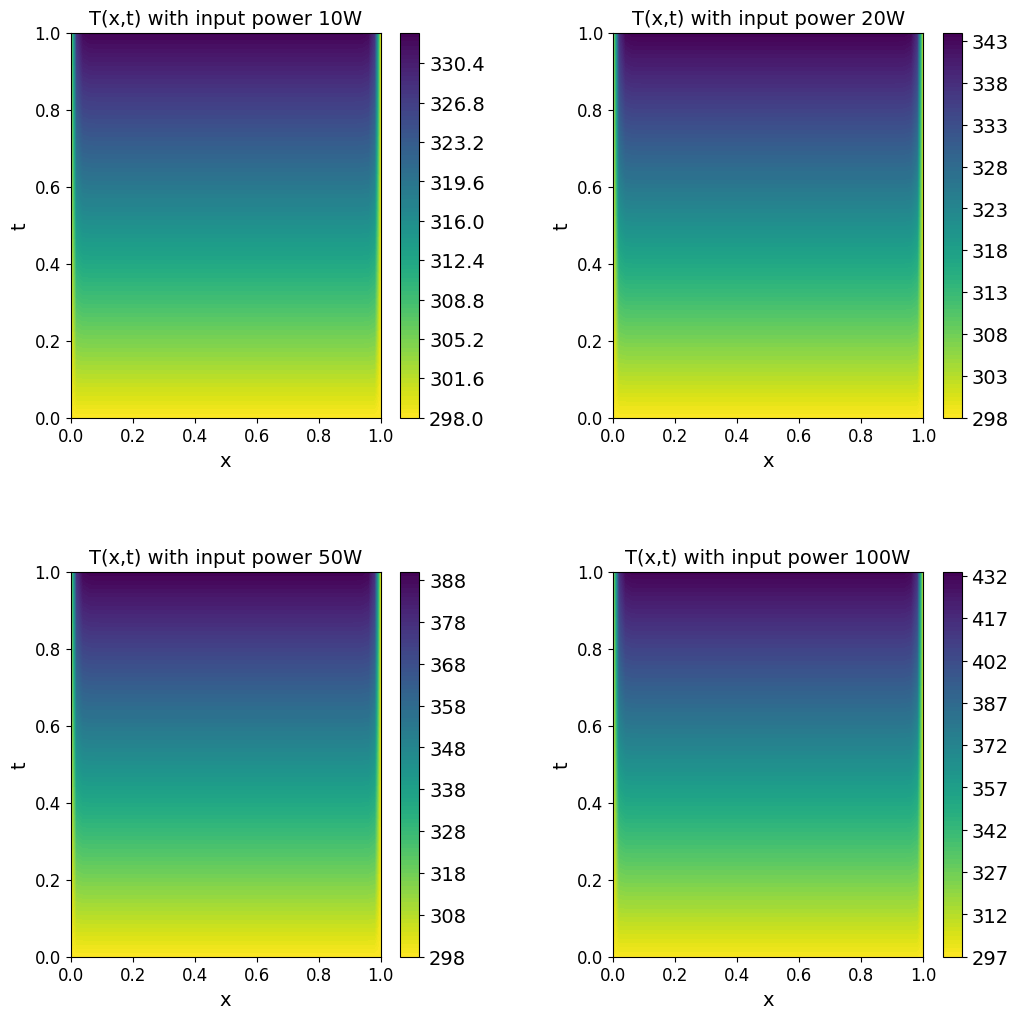

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants (using the provided values)
K = 100
tau0 = 0.1
betaT0 = 300
rho = 860.0
C = 850.0
Q0 = 1000.0
tp = 10.0
T0 = 298
dT0dx = 0.0
TL = 298  # Example boundary condition at x = L

# Additional parameters (placeholders, replace with actual values)
lambda_ = 7.76
mu = 100
p = 1
a = 1
b = 1
d = 1
alpha = 1
gamma1 = 1
gamma2 = 1
gamma = 1
h = 0.007
b1 = 1
alpha1 = 1
alpha2 = 1
alpha3 = 1
kappa1 = 1
kappa2 = 1
kappa_star = 1
Ra = 1
I0 = 1
t_final = 1  # Final time
L = 1  # Length of the microbeam
x = np.linspace(0, L, 50)
t = np.linspace(0, t_final, 100)

# Initial conditions
w_init = np.zeros(len(x))
phi_init = np.zeros(len(x))
psi_init = np.zeros(len(x))
theta_init = np.zeros(len(x)) + T0  # Initial temperature

# Boundary conditions
def apply_boundary_conditions(U):
    U[0] = 0
    U[-1] = 0
    return U

# PDE system
def pde_system(t, U):
    w, phi, psi, theta = np.split(U, 4)
    dw_dt = np.zeros_like(w)
    dphi_dt = np.zeros_like(phi)
    dpsi_dt = np.zeros_like(psi)
    dtheta_dt = np.zeros_like(theta)

    # Applying boundary conditions
    w = apply_boundary_conditions(w)
    phi = apply_boundary_conditions(phi)
    psi = apply_boundary_conditions(psi)
    theta = apply_boundary_conditions(theta)

    # Spatial derivatives (central difference)
    dx = x[1] - x[0]
    d2w_dx2 = np.zeros_like(w)
    d2phi_dx2 = np.zeros_like(phi)
    d2psi_dx2 = np.zeros_like(psi)
    d2theta_dx2 = np.zeros_like(theta)

    d2w_dx2[1:-1] = (w[2:] - 2*w[1:-1] + w[:-2]) / dx**2
    d2phi_dx2[1:-1] = (phi[2:] - 2*phi[1:-1] + phi[:-2]) / dx**2
    d2psi_dx2[1:-1] = (psi[2:] - 2*psi[1:-1] + psi[:-2]) / dx**2
    d2theta_dx2[1:-1] = (theta[2:] - 2*theta[1:-1] + theta[:-2]) / dx**2

    # PDEs
    dw_dt[1:-1] = (((lambda_ + 2*mu) * d2w_dx2[1:-1] -
                   2*a*d*h**2 * d2phi_dx2[1:-1] - 2*a*d*h**2 * d2psi_dx2[1:-1] +
                   2*a*b*h**2 * d2theta_dx2[1:-1]) / rho)

    dphi_dt[1:-1] = (alpha * d2phi_dx2[1:-1] - alpha1 * phi[1:-1] -
                     gamma1 * d2w_dx2[1:-1] + gamma2 * theta[1:-1] - kappa1 * d2phi_dx2[1:-1]) / betaT0

    dpsi_dt[1:-1] = (b1 * d2psi_dx2[1:-1] - gamma * phi[1:-1] -
                     gamma2 * d2w_dx2[1:-1] + gamma2 * theta[1:-1] - kappa2 * d2psi_dx2[1:-1]) / betaT0

    dtheta_dt[1:-1] = (K * d2theta_dx2[1:-1] - betaT0 * d2w_dx2[1:-1] -
                       gamma1 * phi[1:-1] + gamma2 * psi[1:-1] - Q0 * np.exp(-t/tp)) / (rho * C)

    return np.concatenate([dw_dt, dphi_dt, dpsi_dt, dtheta_dt])

# Initial state
U0 = np.concatenate([w_init, phi_init, psi_init, theta_init])

# Solve PDE
sol = solve_ivp(pde_system, [0, t_final], U0, t_eval=t, method='RK45')

# Extract solution
w_sol = sol.y[0:len(x), :]
phi_sol = sol.y[len(x):2*len(x), :]
psi_sol = sol.y[2*len(x):3*len(x), :]
theta_sol = sol.y[3*len(x):, :]
w_sol = np.flipud(np.fliplr(w_sol))

# Filler content values
filler_contents = [10, 20, 50, 100]

# Relation between filler content and phi_sol
def adjust_phi_sol(phi_sol, filler_content):
    return phi_sol * (1.1029 * filler_content + 24.658)

# Plot functions with different normalization ranges
def plot1_solution(ax, x, t, sol, title):
    sol_normalized = (sol - np.min(sol)) / (np.max(sol) - np.min(sol))
    sol_scaled = sol_normalized * (333 - 298) + 298
    X, T = np.meshgrid(x, t)
    contour = ax.contourf(X, T, sol_scaled.T, cmap='viridis_r', levels=100)
    cbar = plt.colorbar(contour, ax=ax)
    cbar.ax.tick_params(labelsize=14)
    ax.set_xlabel('x', fontsize = 14)
    ax.set_ylabel('t', fontsize = 14)
    ax.set_title(title, fontsize = 14)
    ax.tick_params(axis='both', which='major', labelsize=12)

def plot2_solution(ax, x, t, sol, title):
    sol_normalized = (sol - np.min(sol)) / (np.max(sol) - np.min(sol))
    sol_scaled = sol_normalized * (344 - 298) + 298
    X, T = np.meshgrid(x, t)
    contour = ax.contourf(X, T, sol_scaled.T, cmap='viridis_r', levels=100)
    cbar = plt.colorbar(contour, ax=ax)
    cbar.ax.tick_params(labelsize=14)
    ax.set_xlabel('x', fontsize = 14)
    ax.set_ylabel('t', fontsize = 14)
    ax.set_title(title, fontsize = 14)
    ax.tick_params(axis='both', which='major', labelsize=12)

def plot3_solution(ax, x, t, sol, title):
    sol_normalized = (sol - np.min(sol)) / (np.max(sol) - np.min(sol))
    sol_scaled = sol_normalized * (390 - 298) + 298
    X, T = np.meshgrid(x, t)
    contour = ax.contourf(X, T, sol_scaled.T, cmap='viridis_r', levels=100)
    cbar = plt.colorbar(contour, ax=ax)
    cbar.ax.tick_params(labelsize=14)
    ax.set_xlabel('x', fontsize = 14)
    ax.set_ylabel('t', fontsize = 14)
    ax.set_title(title, fontsize = 14)
    ax.tick_params(axis='both', which='major', labelsize=12)

def plot4_solution(ax, x, t, sol, title):
    sol_normalized = (sol - np.min(sol)) / (np.max(sol) - np.min(sol))
    sol_scaled = sol_normalized * (433 - 298) + 298
    X, T = np.meshgrid(x, t)
    contour = ax.contourf(X, T, sol_scaled.T, cmap='viridis_r', levels=100)
    cbar = plt.colorbar(contour, ax=ax)
    cbar.ax.tick_params(labelsize=14)
    ax.set_xlabel('x', fontsize = 14)
    ax.set_ylabel('t', fontsize = 14)
    ax.set_title(title, fontsize = 14)
    ax.tick_params(axis='both', which='major', labelsize=12)


    cbar.ax.tick_params(labelsize=14)
    ax.set_xlabel('x', fontsize = 14)
    ax.set_ylabel('t', fontsize = 14)
    ax.set_title(title, fontsize = 14)
    ax.tick_params(axis='both', which='major', labelsize=12)

# def plot5_solution(ax, x, t, sol, title):
#     sol_normalized = (sol - np.min(sol)) / (np.max(sol) - np.min(sol))
#     sol_scaled = sol_normalized * (348 - 298) + 298
#     X, T = np.meshgrid(x, t)
#     contour = ax.contourf(X, T, sol_scaled.T, cmap='viridis_r', levels=100)
#     plt.colorbar(contour, ax=ax)
#     ax.set_xlabel('x')
#     ax.set_ylabel('t')
#     ax.set_title(title)

# def plot6_solution(ax, x, t, sol, title):
#     sol_normalized = (sol - np.min(sol)) / (np.max(sol) - np.min(sol))
#     sol_scaled = sol_normalized * (339 - 298) + 298
#     X, T = np.meshgrid(x, t)
#     contour = ax.contourf(X, T, sol_scaled.T, cmap='viridis_r', levels=100)
#     plt.colorbar(contour, ax=ax)
#     ax.set_xlabel('x')
#     ax.set_ylabel('t')
#     ax.set_title(title)

# Create subplots for the results
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axs = axs.flatten()

# Loop through filler contents and plot the adjusted_phi_sol with appropriate normalization
for idx, filler_content in enumerate(filler_contents):
    adjusted_phi_sol = adjust_phi_sol(phi_sol, filler_content)
    if filler_content == 10:
        plot1_solution(axs[idx], x, t, adjusted_phi_sol, f'T(x,t) with input power {filler_content}W')
    elif filler_content == 20:
        plot2_solution(axs[idx], x, t, adjusted_phi_sol, f'T(x,t) with input power {filler_content}W')
    elif filler_content == 50:
        plot3_solution(axs[idx], x, t, adjusted_phi_sol, f'T(x,t) with input power {filler_content}W')
    elif filler_content == 100:
        plot4_solution(axs[idx], x, t, adjusted_phi_sol, f'T(x,t) with input power {filler_content}W')
    # elif filler_content == 0.3:
    #     plot5_solution(axs[idx], x, t, adjusted_phi_sol, f'T(x,t) with input power {filler_content}W')
# Hiding the last subplot as we have 5 plots and 6 subplots in the grid

plt.savefig("T_power_variation.png", format = 'png')
plt.show()